# Исследование надежности заемщиков


In [5]:
import pandas as pd

try:
    data = pd.read_csv('./borrowers_data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [6]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [8]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [9]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [10]:
data['days_employed'] = data['days_employed'].abs()

In [11]:
#Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится для исследования.

In [12]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [13]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [14]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [15]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [16]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [17]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [18]:
data['education'] = data['education'].str.lower()

In [19]:
data.duplicated().sum()

71

In [20]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.



In [21]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [22]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [23]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [24]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [25]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

Создадим таблицу со следующими колонками: 
children - количество детей
borrowers - всего людей с кредитом в данной категории(относительно количества детей)
debt_percentage - доля людей, просрочивших кредит
debtors - количество людей, просрочивших кредит

In [26]:
children_debt_function_info = data.pivot_table(index=['children'], values='debt', aggfunc=('count', 'sum', 'mean'))
children_debt_function_info = children_debt_function_info.rename(columns={'count': 'borrowers', 'mean': 'debt_percentage', 'sum': 'debtors'})
display(children_debt_function_info)

,borrowers,debt_percentage,debtors
children,,,
0,14091,0.075438,1063
1,4808,0.092346,444
2,2052,0.094542,194
3,330,0.081818,27
4,41,0.097561,4
5,9,0.000000,0


c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprec

Text(0.5, 1.0, 'Зависимость между количеством детей и возвратом кредита в срок ')

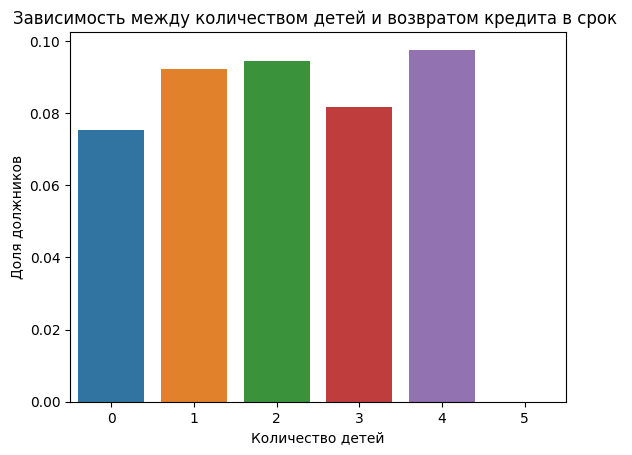

In [27]:
import seaborn as sb
import matplotlib.pyplot as plt
children = [0,1,2,3,4,5]
sb.barplot(x=children ,y=children_debt_function_info['debt_percentage'])
plt.xlabel('Количество детей') 
plt.ylabel('Доля должников')
plt.title('Зависимость между количеством детей и возвратом кредита в срок ')

Проверим, каких клиентов в базе больше всего:

<Axes: >

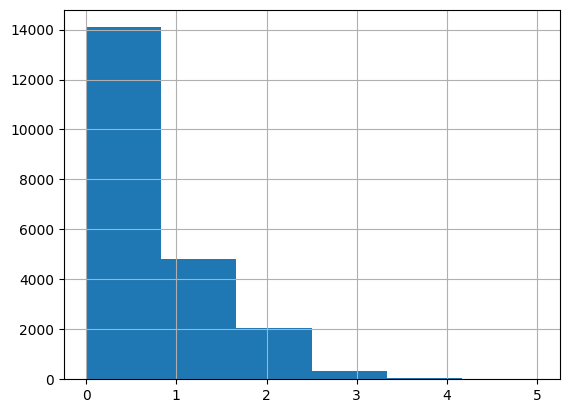

In [28]:
data['children'].hist(bins=6)

По гистограмме видно, что клиентов с 0-2 детьми большинство. Значит выводы можно делать только по их данным. Для анализа клиентов с большим количеством детей недостаточно статистики.

**Вывод:** 
Гипотезу можно проверить только учитывая данные о клиентах с 0-2 детьми. Процент должников растет с увеличением количества детей. Данные показывают большой скачок при переходе от бездетного человека к человеку с одним ребенком, когда при переходе от человека с одним ребенком к человеку с двумя детьми, скачок не такой сильный. Гипотеза подтверждена.

####  Есть ли зависимость между семейным положением и возвратом кредита в срок?

Создадим таблицу со следующими колонками: 
family_status - семейный статус
borrowers - всего людей с кредитом в данной категории(относительно семейного статуса)
debt_percentage - доля людей, просрочивших кредит
debtors - количество людей, просрочивших кредит

In [30]:
family_status_debt_function_info = data.pivot_table(index=['family_status'], values='debt', aggfunc=('count', 'sum', 'mean'))
family_status_debt_function_info = family_status_debt_function_info.rename(columns={'count': 'borrowers', 'mean': 'debt_percentage', 'sum': 'debtors'})
display(family_status_debt_function_info)

,borrowers,debt_percentage,debtors
family_status,,,
Не женат / не замужем,2796,0.097639,273
в разводе,1189,0.070648,84
вдовец / вдова,951,0.066246,63
гражданский брак,4134,0.093130,385
женат / замужем,12261,0.075606,927


c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprec

Text(0.5, 1.0, 'Зависимость между семейным положением и возвратом кредита в срок ')

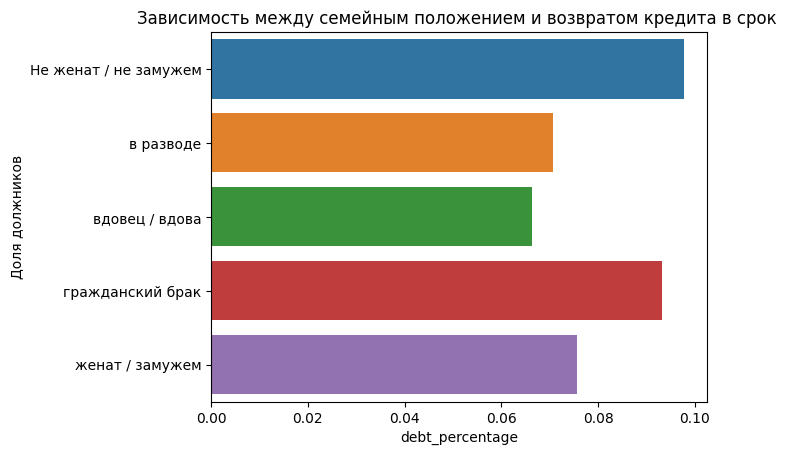

In [31]:
family_status = ['Не женат / не замужем','в разводе','вдовец / вдова','гражданский брак','женат / замужем']
sb.barplot(x=family_status_debt_function_info['debt_percentage'] ,y=family_status)

import matplotlib.pyplot as plt


 
plt.ylabel('Доля должников')
plt.title('Зависимость между семейным положением и возвратом кредита в срок ')

In [32]:
def categorize_family_status(row):
    
    if 'Не женат / не замужем' in row or 'в разводе' in row or 'вдовец / вдова' in row:
        return 'одинокий/ая'
    elif 'гражданский брак' in row or 'женат / замужем' in row:
        return 'семья'
        
   

In [33]:
data['family_status_category'] = data['family_status'].apply(categorize_family_status)

In [34]:
family_status_category_debt_function_info = data.pivot_table(index=['family_status_category'], values='debt', aggfunc=('count', 'sum', 'mean'))
family_status_category_debt_function_info = family_status_category_debt_function_info.rename(columns={'count': 'borrowers', 'mean': 'debt_percentage', 'sum': 'debtors'})
display(family_status_category_debt_function_info)

,borrowers,debt_percentage,debtors
family_status_category,,,
одинокий/ая,4936,0.085089,420
семья,16395,0.080024,1312


c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprec

Text(0.5, 1.0, 'Зависимость между семейным положением и возвратом кредита в срок ')

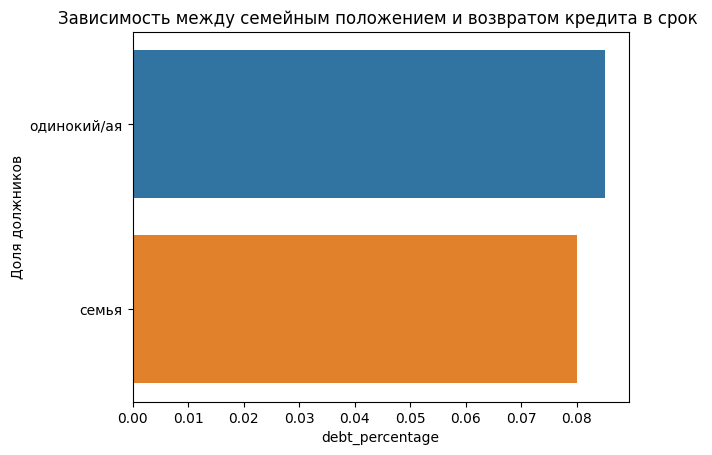

In [35]:
family_status_category = ['одинокий/ая','семья']
sb.barplot(x=family_status_category_debt_function_info['debt_percentage'] ,y=family_status_category)

import matplotlib.pyplot as plt


 
plt.ylabel('Доля должников')
plt.title('Зависимость между семейным положением и возвратом кредита в срок ')

**Вывод**
После объединения групп, можно увидеть, что процент должников среди одиноких людей выше, чем среди семейных людей. Важно учесть, что это средние показатели, потому что например у вдов/вдовцов наименьший процент должников.

####  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Создадим таблицу со следующими колонками: 
total_income_category - категория платежеспособности, где при доходе в:
0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.
borrowers - всего людей с кредитом в данной категории(относительно семейного статуса)
debt_percentage - доля людей, просрочивших кредит
debtors - количество людей, просрочивших кредит

In [36]:
total_income_category_debt_function_info = data.pivot_table(index=['total_income_category'], values='debt', aggfunc=('count', 'sum', 'mean'))
total_income_category_debt_function_info = total_income_category_debt_function_info.rename(columns={'count': 'borrowers', 'mean': 'debt_percentage', 'sum': 'debtors'})
display(total_income_category_debt_function_info)

,borrowers,debt_percentage,debtors
total_income_category,,,
A,25,0.080000,2
B,5014,0.070602,354
C,15921,0.084982,1353
D,349,0.060172,21
E,22,0.090909,2


c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprec

<Axes: ylabel='debt_percentage'>

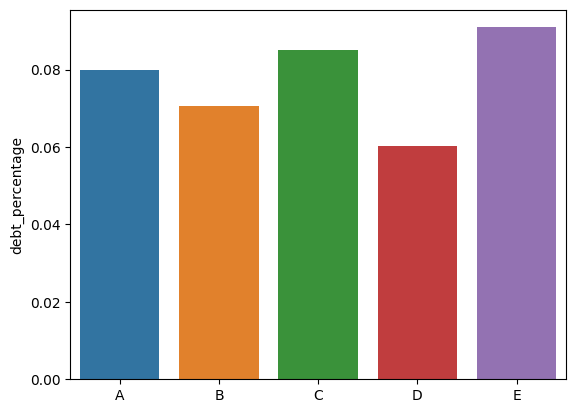

In [37]:
total_income_category = ['A','B','C','D','E']
sb.barplot(x=total_income_category ,y=total_income_category_debt_function_info['debt_percentage'])

Проверим, каких клиентов в данной категории больше всего, построим гистограмму

<Axes: >

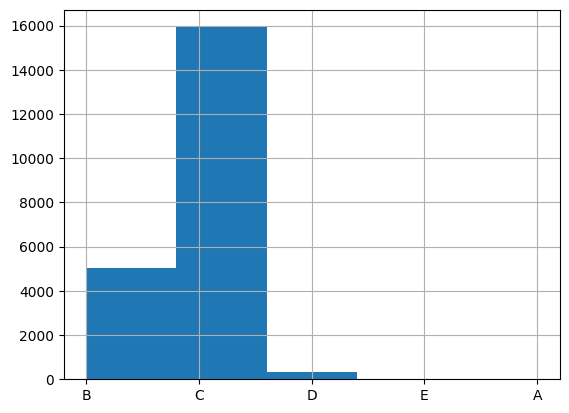

In [38]:
data['total_income_category'].hist(bins=5)

**Вывод:** 
На гистограмме видно, что клиентов категорий В и С - большинство, поэтому выводы необходимо делать на основании этих двух категорий. Видно, что процент должников растет с категорией. Для более подробного анализа требуется разбиение этих двух категорий на большее количество, чтобы точнее определить зависимость, потому что на основании двух столбцов делать вывод - как пальцем в небо тыкать

#### Как разные цели кредита влияют на его возврат в срок?

Создадим таблицу со следующими колонками: 
purpose_category - цели кредита, такие как:
операции с автомобилем,
операции с недвижимостью,
проведение свадьбы,
получение образования.
borrowers - всего людей с кредитом в данной категории(относительно семейного статуса)
debt_percentage - доля людей, просрочивших кредит
debtors - количество людей, просрочивших кредит

In [39]:
purpose_category_debt_function_info = data.pivot_table(index=['purpose_category'], values='debt', aggfunc=('count', 'sum', 'mean'))
purpose_category_debt_function_info = purpose_category_debt_function_info.rename(columns={'count': 'borrowers', 'mean': 'debt_percentage', 'sum': 'debtors'})
display(purpose_category_debt_function_info)

,borrowers,debt_percentage,debtors
purpose_category,,,
операции с автомобилем,4279,0.093480,400
операции с недвижимостью,10751,0.072551,780
получение образования,3988,0.092528,369
проведение свадьбы,2313,0.079118,183


c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Lerusik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprec

Text(0.5, 1.0, 'Зависимость между целями кредита и возвратом кредита в срок ')

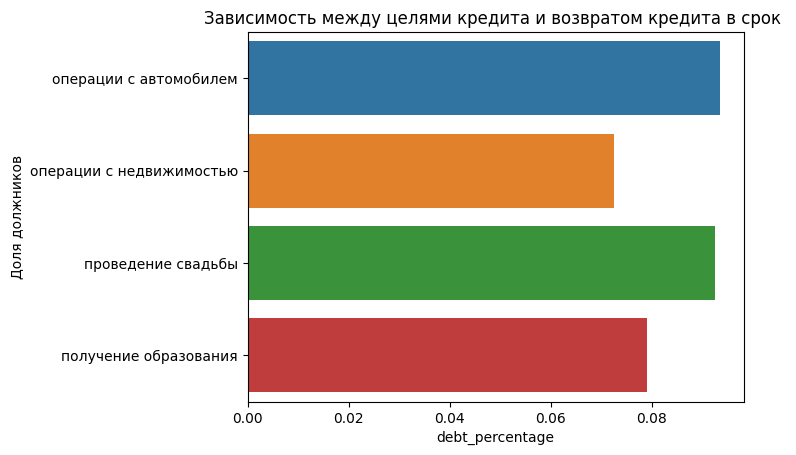

In [40]:
purpose_category = ['операции с автомобилем', 'операции с недвижимостью', 'проведение свадьбы','получение образования']
sb.barplot(x=purpose_category_debt_function_info['debt_percentage'] ,y=purpose_category)
import matplotlib.pyplot as plt


 
plt.ylabel('Доля должников')
plt.title('Зависимость между целями кредита и возвратом кредита в срок ')

Проверим, каких клиентов в данной категории больше всего, построим гистограмму

<Axes: >

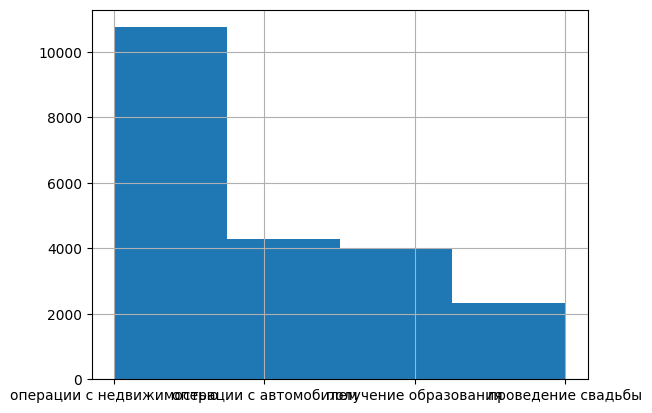

In [41]:
data['purpose_category'].hist(bins=4)

**Вывод:** 
Чаще всего берут кредиты на операции с недвижимостью и чаще всего возвращают в срок именно в этой категории. Данных для остальных категорий на порядок меньше, поэтому анализ может быть недостаточно точным для всех категорий. 

По частоте дальше идут операции с автомобилем, с получением образования и проведением свадьбы. Статистика этих категорий примерно на одном уровне, поэтому можно сказать, что среди этих операций большинство должников приходится на операции с автомобилем, далее на операции, связанные с проведением свадьбы, а меньший процент должников наблюдается при операциях, связанных с получением образования.
	

#### Возможные причины появления пропусков в исходных данных.


В данных есть пропущенные значения в двух столбцах: days_employed(общий трудовой стаж в днях) и total_income(ежемесячный доход). *Общая возможная причина пропусков - технический сбой при выгрузке данных*

Общий трудовой стаж в днях довольно тяжело посчитать. У кого-то он мог прерываться декретом или неопределенным безработным периодом. Также работа могла быть неофициальной и стаж "не записывался" в трудовую книжку. Также люди могли не сообщить эту информацию, как и во втором случае.

Доход может варьироваться от месяца к месяцу, также человек может получать деньги посуточно и не считать месячную выручку. За год человек мог сменить профессию, выйти на работу после безработного периода или получить повышение с заметной разницей в зарплате. В таких случаях тяжело вычислить средний ежемесячный доход.

### Общий вывод.

В данном проекте были проанализированы данные кредитных платежей и кредитованных людей. 

Для начала данные были изучены и предобработаны:удалены пропуски, дубликаты, аномальные значения. Затем были выделены некоторые категории клиентов банка, которые объединили данные и выявили общие тенденции. 

Основной задачей исследования было выявление зависимостей между выплатой кредита в срок и различными показателями.


Таким образом, исследование взаимосвязей показало, что:
Цели кредита влияют на сроки его выплаты. Чаще всего берут кредиты на операции с недвижимостью и чаще всего возвращают в срок именно в этой категории. Данных для остальных категорий на порядок меньше, поэтому анализ может быть недостаточно точным для всех категорий. 

По частоте дальше идут операции с автомобилем, с получением образования и проведением свадьбы. Статистика этих категорий примерно на одном уровне, поэтому можно сказать, что среди этих операций большинство должников приходится на операции с автомобилем, далее на операции, связанные с проведением свадьбы, а меньший процент должников наблюдается при операциях, связанных с получением образования.
	

Семейное положение влияет на сроки выплаты кредита.После объединения групп, можно увидеть, что процент должников среди одиноких людей выше, чем среди семейных людей. Важно учесть, что это средние показатели, потому что например у вдов/вдовцов наименьший процент должников. При создании системы оценивания нужно учитывать расширенный анализ семейного положения с присуждением каждой категории отдельного коэффициента. *знаю, что статистики маловато, чтобы делать выводы о вдовах, но и всех остальных одиноких тоже мало относительно семейных. Количество отличается порядком, результаты могут поменяться при наличии новых данных об одиноких*


Клиентов с доходами 50001–200000 и 200001–1000000 — большинство, поэтому выводы необходимо делать на основании этих двух категорий. Процент должников уменьшается с увеличением зарплаты. 

Наличие детей влияет на сроки выплаты кредита. Процент должников растет с увеличением количества детей. Данные показывают большой скачок при переходе от бездетного человека к человеку с одним ребенком, когда при переходе от человека с одним ребенком к человеку с двумя детьми, скачок не такой сильный. Клиентов с тремя и более детьми мало, поэтому оценивать их платежеспособность на фоне бездетных и малодетных не имеет смысла.